# Project: Yelp WAX

## Part 1 - Understanding your data and question

You will be pulling data from the Yelp API to complete your analysis. The api, however, provides you with a lot of information that will not be pertinent to your analysis. YOu will pull data from the api and parse through it to keep only the data that you will need. In order to help you identify that information,look at the API documentation and understand what data the api will provide you. 

Identify which data fields you will want to keep for your analysis. 

https://www.yelp.com/developers/documentation/v3/get_started

___

## Part 2 - Create ETL pipeline for the business data from the API

Now that you know what data you need from the API, you want to write code that will execute a api call, parse those results and then insert the results into the DB.  

It is helpful to break this up into three different functions (*api call, parse results, and insert into DB*) and then you can write a function/script that pull the other three functions together. 

Let's first do this for the Business endpoint.

WAX:
https://www.yelp.com/developers/documentation/v3/business_search
ETL - extract, transform, load

In [355]:
import requests
import json
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_funcs import *

In [4]:
biz_url =  'https://api.yelp.com/v3/businesses/search' # for business search
rev_url = 'https://api.yelp.com/v3/businesses/{id}/reviews' # for reviews

In [5]:
# for debugging
headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

In [6]:
# what type of business do you want to search
term = 'sushi'
#where do you want to perform this search
location = 'New York City'
# what is your other parameter you want to search against
categories = 'restaurants'
biz_filepath = '../data/biz_data.csv'
rev_filepath = '../data/rev_data.csv'

url_params = {
    "term": term.replace(' ', '+'),
    "location": location.replace(' ', '+'),
    "categories" : categories,
    "limit": 50,
}
max_results = 1000 # for testing purposes, limit the amount of API calls to the server

In [5]:
# main fuction call for business data for New York City
get_biz_data(biz_url, url_params, biz_filepath, max_results, 'y')

Gathering business info:
Deleted existing biz_data.csv file.
Created new biz_data.csv file and added headers:
['id', 'name', 'is_closed', 'review_count', 'zip_code', 'rating', 'price']
Successfully gathered listings for maximum of 1000 businesses of type 'restaurants', search term 'sushi', in 'Brooklyn'.


In [6]:
# debugging
# biz_id = 'EIcbGkl6bRtAi12zcjA7-A'
# rev_url_id = rev_url.format(id = biz_id)
# response = requests.get(rev_url_id, headers=headers, params=url_params)
# print(response)
# data = response.json()

In [7]:
# main fuction call for business data for Los Angeles
location = 'Los Angeles'
url_params['location'] = location.replace(' ', '+')
get_biz_data(biz_url, url_params, biz_filepath, max_results)

Gathering business info:
Appending to biz_data.csv file with headers:
['id', 'name', 'is_closed', 'review_count', 'zip_code', 'rating', 'price']
Successfully gathered listings for maximum of 1000 businesses of type 'restaurants', search term 'sushi', in 'Los+Angeles'.


___

## Part 3 -  Create ETL pipeline for the restaurant review data from the API

You've done this for the Businesses, now you need to do this for reviews. You will follow the same process, but your functions will be specific to reviews. Above you ahve a model of the functions you will need to write, and how to pull them together in one script. For this part, you ahve the process below 

In [8]:
# API calls to gather reviews for each business in Business CSV file
get_rev_data(biz_filepath, rev_url, rev_filepath)

Gathering reviews:
Deleted existing rev_data.csv file.
Created new rev_data.csv file and added headers:
['id', 'business_id', 'text', 'rating']
Successfully gathered up to 3 reviews each for 2000 businesses.


___

## Part 4 -  Using python and pandas, write code to answer the questions below. 


- Which are the 5 most reviewed businesses in your dataset?
- What is the highest rating recieved in your data set and how many businesses have that rating?
- What percentage of businesses have a rating greater than or  4.5?
- What percentage of businesses have a rating less than 3?
- What percentage of your businesseshave a price label of one dollar sign? Two dollar signs? Three dollar signs? No dollar signs?
- Return the text of the reviews for the most reviewed business. 
- Find the highest rated business and return text of the most recent review. If multiple business have the same rating, select the business with the most reviews. 
- Find the lowest rated business and return text of the most recent review.  If multiple business have the same rating, select the business with the least reviews. 


In [451]:
# import business data from CSV and create DataFrame
biz_data = import_csv(biz_filepath)
biz_df = pd.DataFrame(biz_data)
biz_df.set_index('name',inplace = True)
biz_df.info()
biz_df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, Sushi Yashin to Gatten Sushi
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2000 non-null   object
 1   is_closed     2000 non-null   object
 2   review_count  2000 non-null   object
 3   zip_code      2000 non-null   object
 4   rating        2000 non-null   object
 5   price         2000 non-null   object
dtypes: object(6)
memory usage: 109.4+ KB


(2000, 6)

In [14]:
# check if any are permanently closed
(biz_df['is_closed']=='True').sum()

0

In [452]:
# drop the one listing that does not have a zip code
# convert dtypes as appropriate
biz_df.drop(biz_df[biz_df['zip_code'] == ''].index, inplace = True)
biz_df['id'] = biz_df['id'].astype('string')
biz_df['is_closed'] = biz_df['review_count'].astype(bool)
biz_df['review_count'] = biz_df['review_count'].apply(int)
biz_df['zip_code'] = biz_df['zip_code'].apply(int)
biz_df['rating'] = biz_df['rating'].apply(float)
biz_df['price'] = biz_df['price'].astype('string')
biz_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, Sushi Yashin to Gatten Sushi
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1999 non-null   string 
 1   is_closed     1999 non-null   bool   
 2   review_count  1999 non-null   int64  
 3   zip_code      1999 non-null   int64  
 4   rating        1999 non-null   float64
 5   price         1999 non-null   string 
dtypes: bool(1), float64(1), int64(2), string(2)
memory usage: 95.7+ KB


Which are the 5 most reviewed businesses in your dataset?

In [16]:
biz_df['review_count'].sort_values(ascending = False).head(5)

name
Daikokuya Little Tokyo              8641
Slurpin' Ramen Bar - Los Angeles    4636
Tsujita LA Artisan Noodle           4058
Sushi Gen                           3812
Marugame Monzo                      3798
Name: review_count, dtype: int64

What is the highest rating recieved in your data set and how many businesses have that rating?

In [17]:
biz_df['rating'].max()

5.0

In [28]:
perfect_5 = biz_df['rating'].value_counts().sort_index()
perfect_5

1.5      1
2.0      9
2.5     15
3.0     99
3.5    397
4.0    879
4.5    500
5.0     99
Name: rating, dtype: int64

In [31]:
perfect_5[perfect_5.index==5.0]

5.0    99
Name: rating, dtype: int64

What percentage of businesses have a rating greater than or equal to 4.5?

In [29]:
ratings = 100*biz_df['rating'].value_counts(normalize=True).sort_index()
ratings

1.5     0.050025
2.0     0.450225
2.5     0.750375
3.0     4.952476
3.5    19.859930
4.0    43.971986
4.5    25.012506
5.0     4.952476
Name: rating, dtype: float64

In [206]:
ratings[ratings.index>=4.5].sum()

29.964982491245628

What percentage of businesses have a rating less than 3?

In [208]:
ratings[ratings.index<3.0].sum()

1.2506253126563283

What percentage of your businesses have a price label of one dollar sign? Two dollar signs? Three dollar signs? No dollar signs?

In [224]:
prices = 100*(biz_df['price'].value_counts()/len(biz_df['price'])).sort_index()
prices

        16.008004
$        6.853427
$$      64.732366
$$$      7.553777
$$$$     4.852426
Name: price, dtype: float64

Return the text of the reviews for the most reviewed business.

In [244]:
biz_df['review_count'].max()

8641

In [246]:
biz_df[biz_df['review_count'] == biz_df['review_count'].max()]['id']

name
Daikokuya Little Tokyo    iSZpZgVnASwEmlq0DORY2A
Name: id, dtype: string

In [532]:
biz_df[biz_df.index == 'Daikokuya Little Tokyo'] # most reviewed in LA - best name recognition

,id,is_closed,review_count,zip_code,rating,price
name,,,,,,
Daikokuya Little Tokyo,iSZpZgVnASwEmlq0DORY2A,True,8641,90012,4.0,$$


In [535]:
# find most reviewed in NYC
biz_nyc = biz_df[biz_df['zip_code'] < 50000]
biz_nyc[biz_nyc['review_count'] == biz_nyc['review_count'].max()]['id']

name
Izakaya MEW    klAhw3xLQi9GF1tf_HnS7w
Name: id, dtype: string

In [536]:
biz_nyc[biz_nyc.index == 'Izakaya MEW'] # most reviewed in NYC - best name recognition

,id,is_closed,review_count,zip_code,rating,price
name,,,,,,
Izakaya MEW,klAhw3xLQi9GF1tf_HnS7w,True,2344,10001,4.0,$$


In [42]:
# import the Reviews CSV and create a DataFrame
rev_data = import_csv(rev_filepath)
rev_df = pd.DataFrame(rev_data)
rev_df.info()
rev_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5925 entries, 0 to 5924
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5925 non-null   object
 1   business_id  5925 non-null   object
 2   text         5925 non-null   object
 3   rating       5925 non-null   object
dtypes: object(4)
memory usage: 185.3+ KB


(5925, 4)

In [56]:
# convert dtypes as appropriate
rev_df['id'] = rev_df['id'].astype('string')
rev_df.rename(columns={'id':'rev_id'}, inplace = True)
rev_df['business_id'] = rev_df['business_id'].astype('string')
rev_df['text'] = rev_df['text'].astype('string')
rev_df['rating'] = rev_df['rating'].apply(float)
rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5925 entries, 0 to 5924
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev_id       5925 non-null   string 
 1   business_id  5925 non-null   string 
 2   text         5925 non-null   string 
 3   rating       5925 non-null   float64
dtypes: float64(1), string(3)
memory usage: 185.3 KB


In [176]:
# reset the index so that we can use 'id' to join
biz_df.reset_index(inplace = True)
biz_df.set_index('id', inplace = True)

In [196]:
# join the two DataFrames
br_df = biz_df.merge(rev_df, left_on = 'id', right_on = 'business_id', suffixes=('_biz', '_rev'))
br_df['name'] = br_df['name'].astype('string')
br_df.info()
br_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5934 entries, 0 to 5933
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          5934 non-null   string 
 1   is_closed     5934 non-null   bool   
 2   review_count  5934 non-null   int64  
 3   zip_code      5934 non-null   int64  
 4   rating_biz    5934 non-null   float64
 5   price         5934 non-null   string 
 6   rev_id        5934 non-null   string 
 7   business_id   5934 non-null   string 
 8   text          5934 non-null   string 
 9   rating_rev    5934 non-null   float64
dtypes: bool(1), float64(2), int64(2), string(5)
memory usage: 469.4 KB


(5934, 10)

In [291]:
[print(x) for x in br_df.loc[br_df['name']=='Daikokuya Little Tokyo']['text']]

Daikokuya just never disappoints!
Went last night for the first time during Covid-
Short wait and outdoor dining.
If you haven't eaten there yet, there are...
I've been come here for years.  Never disappoints!     Waiting in line and dining in is what I missed the most.  lol

Due to COVID, takeout is the only...
{Overall: 5; Food: 5; Service: 5; Atmosphere: 4}

So good. Daikokuya is my new favorite ramen.

*Daikoku Ramen: The noodles were cooked perfectly -...


[None, None, None]

Find the highest rated business and return text of the most recent review. If multiple business have the same rating, select the business with the most reviews.

In [341]:
# highest possible rating is 5.0
high_rest_max = br_df[br_df['rating_biz']==5.0]['review_count'].max()
high_rest = br_df[(br_df['rating_biz']==5.0) & (br_df['review_count']==high_rest_max)]

In [342]:
print(high_rest.loc[high_rest['time_created'] == high_rest['time_created'].max()]['text'].item())

Review for call in takeout order during covid

Ordering: The call in order was quick and easy, with an estimated time of 15-20 minutes. 

Food: Ordered two...


Find the lowest rated business and return text of the most recent review. If multiple business have the same rating, select the business with the least reviews.

In [353]:
# we know from above the lowest rating is 1.5
low_rest_min = br_df[br_df['rating_biz']==1.5]['review_count'].min()
low_rest = br_df[(br_df['rating_biz']==1.5) & (br_df['review_count']==low_rest_min)]

In [354]:
print(low_rest.loc[low_rest['time_created'] == low_rest['time_created'].max()]['text'].item())

If I could give zero stars I would. We ordered from postmates and against my better judgement we decided to try delivery sushi......

Missing items, no...


___

## Part 5: Visualizations

In [538]:
# Convert dollar signs to number, only for those with 'price' data
# cond = [(biz_df_price['price'] == '$'),
#         (biz_df_price['price'] == '$$'),
#         (biz_df_price['price'] == '$$$'),
#         (biz_df_price['price'] == '$$$$')]
# cond = [(biz_df_price['price'].str.contains('$$$$', na=False)),
#         (biz_df_price['price'].str.contains('$$$', na=False)),
#         (biz_df_price['price'].str.contains('$$', na=False)),
#         (biz_df_price['price'].str.contains('$', na=False))]
# choices = ['1', '2', '3', '4']
# choices = ['4', '3', '2', '1']
# biz_df_price['price_num'] = np.select(cond, choices)
biz_df_price = biz_df.drop(biz_df[biz_df['price']==''].index)
biz_df_price['price'].replace('$','1',inplace = True)
biz_df_price['price'].replace('$$','2',inplace = True)
biz_df_price['price'].replace('$$$','3',inplace = True)
biz_df_price['price'].replace('$$$$','4',inplace = True)

# Split DataFrames by geograpical region
biz_nyc = biz_df[biz_df['zip_code'] < 50000]
biz_la = biz_df[biz_df['zip_code'] > 50000]


/Users/wax/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


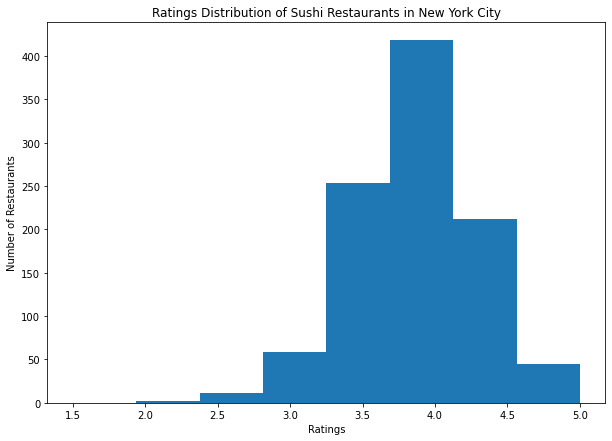

In [514]:
# New York City restaurant ratings
fig, ax = plt.subplots(figsize = [10,7])
ax.hist(biz_nyc['rating'], bins = 8, range=[1.5,5.0])
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Restaurants')
ax.set_title('Ratings Distribution of Sushi Restaurants in New York City')
plt.savefig("../visualizations/nyc_ratings.png", orientation = 'landscape')

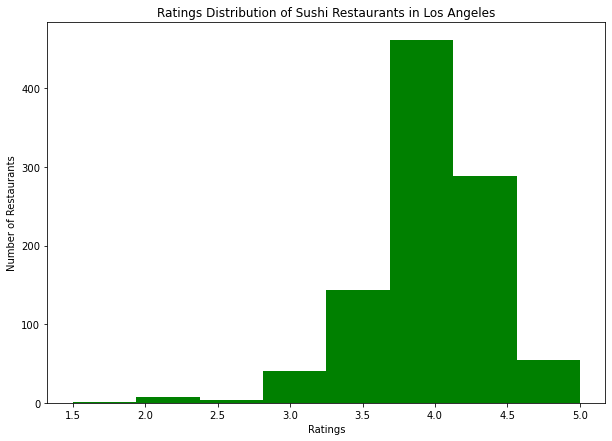

In [517]:
# Los Angeles restaurant ratings
fig, ax = plt.subplots(figsize = [10,7])
ax.hist(biz_la['rating'], bins = 8, range=[1.5,5.0], color = 'g')
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Restaurants')
ax.set_title('Ratings Distribution of Sushi Restaurants in Los Angeles')
plt.savefig("../visualizations/la_ratings.png", orientation = 'landscape')

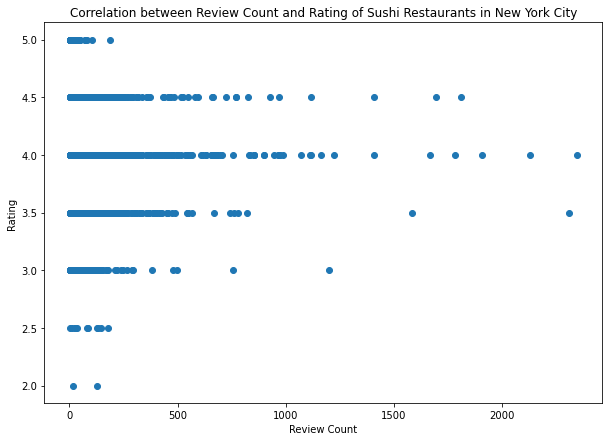

In [518]:
# Correlation between restaurant rating and # of reviews in New York City
fig, ax = plt.subplots(figsize = [10,7])
ax.scatter(biz_nyc['review_count'], biz_nyc['rating'])
ax.set_xlabel('Review Count')
ax.set_ylabel('Rating')
ax.set_title('Correlation between Review Count and Rating of Sushi Restaurants in New York City')
plt.savefig("../visualizations/nyc_rev_rate.png", orientation = 'landscape')

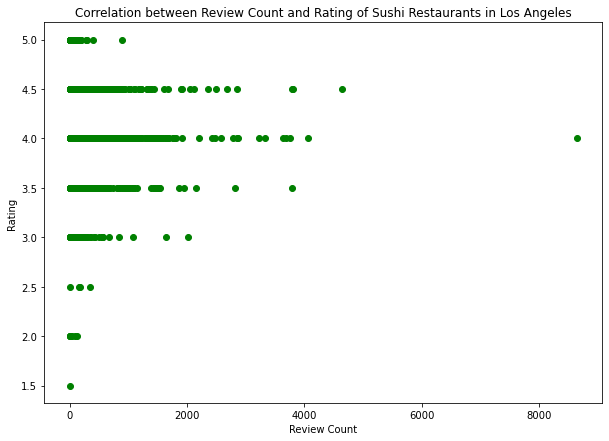

In [519]:
# Correlation between restaurant rating and # of reviews in LA
fig, ax = plt.subplots(figsize = [10,7])
ax.scatter(biz_la['review_count'], biz_la['rating'], color = 'g')
ax.set_xlabel('Review Count')
ax.set_ylabel('Rating')
ax.set_title('Correlation between Review Count and Rating of Sushi Restaurants in Los Angeles')
plt.savefig("../visualizations/la_rev_rate.png", orientation = 'landscape')

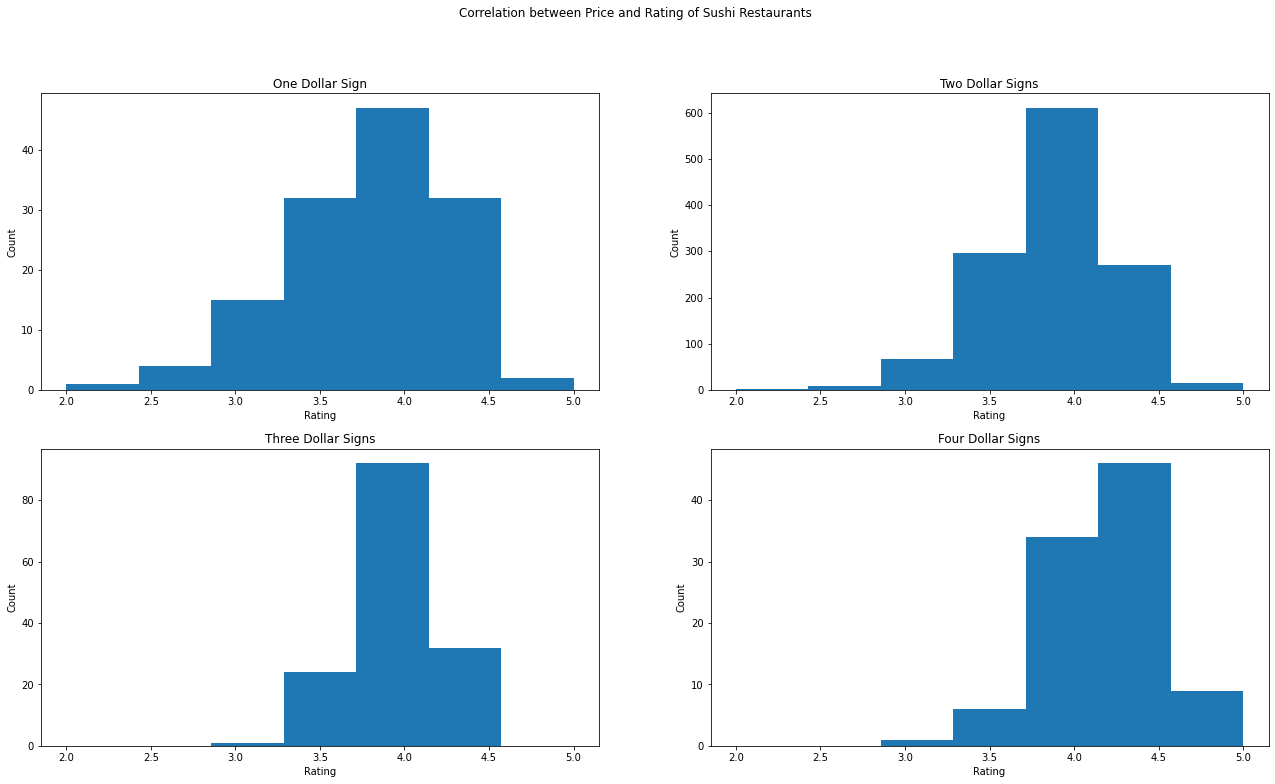

In [524]:
# Correlation between restaurant price and rating across markets
fig, ax = plt.subplots(2, 2, figsize=(22, 12))
ax[0,0].hist(biz_df_price[biz_df_price['price']=='1']['rating'], bins = 7, range = [2,5])
ax[0,0].set_xlabel('Rating')
ax[0,0].set_ylabel('Count')
ax[0,0].set_title('One Dollar Sign')
ax[0,1].hist(biz_df_price[biz_df_price['price']=='2']['rating'], bins = 7, range = [2,5])
ax[0,1].set_xlabel('Rating')
ax[0,1].set_ylabel('Count')
ax[0,1].set_title('Two Dollar Signs')
ax[1,0].hist(biz_df_price[biz_df_price['price']=='3']['rating'], bins = 7, range = [2,5])
ax[1,0].set_xlabel('Rating')
ax[1,0].set_ylabel('Count')
ax[1,0].set_title('Three Dollar Signs')
ax[1,1].hist(biz_df_price[biz_df_price['price']=='4']['rating'], bins = 7, range = [2,5])
ax[1,1].set_xlabel('Rating')
ax[1,1].set_ylabel('Count')
ax[1,1].set_title('Four Dollar Signs')
fig.suptitle('Correlation between Price and Rating of Sushi Restaurants')
plt.savefig("../visualizations/price_rate.png", orientation = 'landscape')

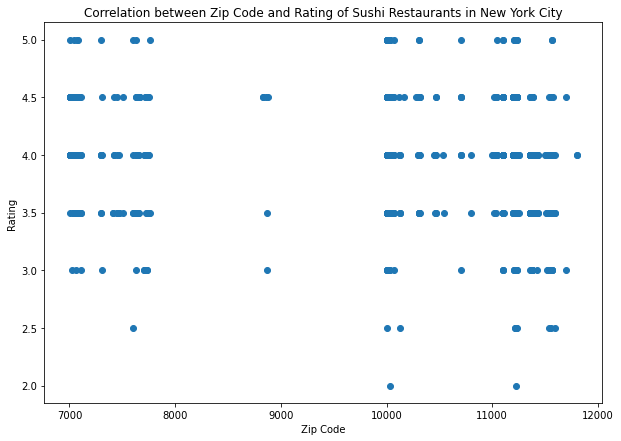

In [528]:
# Correlation between zip code and rating in New York City
fig, ax = plt.subplots(figsize = [10,7])
ax.scatter(biz_nyc['zip_code'].sort_values(), biz_nyc['rating'])
ax.set_xlabel('Zip Code')
ax.set_ylabel('Rating')
ax.set_title('Correlation between Zip Code and Rating of Sushi Restaurants in New York City')
plt.savefig("../visualizations/nyc_zip_rate.png", orientation = 'landscape')

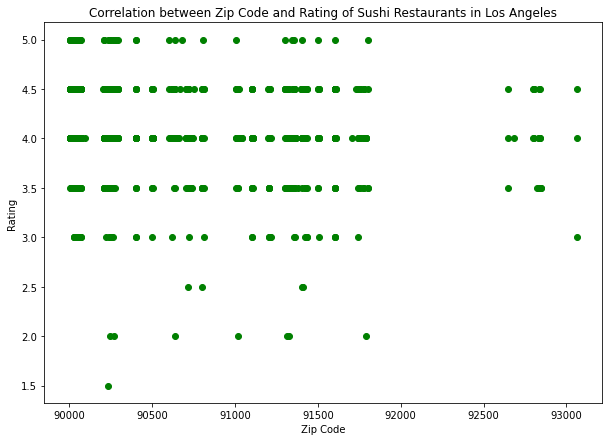

In [530]:
# Correlation between zip code and rating in Los Angeles
fig, ax = plt.subplots(figsize = [10,7])
ax.scatter(biz_la['zip_code'].sort_values(), biz_la['rating'], color='g')
ax.set_xlabel('Zip Code')
ax.set_ylabel('Rating')
ax.set_title('Correlation between Zip Code and Rating of Sushi Restaurants in Los Angeles')
plt.savefig("../visualizations/la_zip_rate.png", orientation = 'landscape')

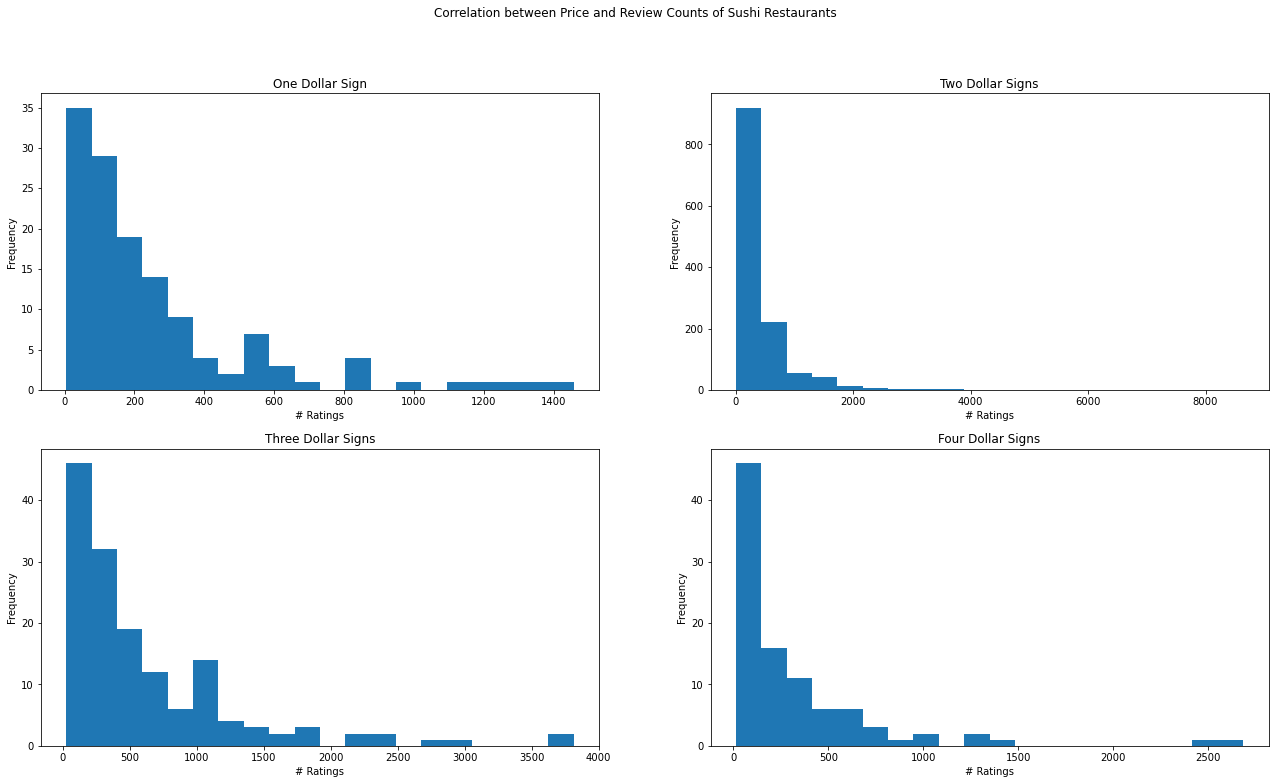

In [547]:
# Correlation between restaurant price and review count across markets
fig, ax = plt.subplots(2, 2, figsize=(22, 12))
ax[0,0].hist(biz_df_price[biz_df_price['price']=='1']['review_count'],
             bins = 20)
ax[0,0].set_xlabel('# Ratings')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('One Dollar Sign')
ax[0,1].hist(biz_df_price[biz_df_price['price']=='2']['review_count'],
             bins = 20)
ax[0,1].set_xlabel('# Ratings')
ax[0,1].set_ylabel('Frequency')
ax[0,1].set_title('Two Dollar Signs')
ax[1,0].hist(biz_df_price[biz_df_price['price']=='3']['review_count'],
             bins = 20)
ax[1,0].set_xlabel('# Ratings')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_title('Three Dollar Signs')
ax[1,1].hist(biz_df_price[biz_df_price['price']=='4']['review_count'],
             bins = 20)
ax[1,1].set_xlabel('# Ratings')
ax[1,1].set_ylabel('Frequency')
ax[1,1].set_title('Four Dollar Signs')
fig.suptitle('Correlation between Price and Review Counts of Sushi Restaurants')
plt.savefig("../visualizations/price_rev.png", orientation = 'landscape')